#### Example of Regression Analysis Using the Boston Housing Data Set.

In [1]:
from sklearn.model_selection import KFold
# ElasticNet is the combination of L2 Norm and L1 Norm so it tries to get a combination of both worlds.
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [3]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print (boston.data.shape) # we have have 506 data points and 13 features
print (boston.target.shape) # we a target. 

(506, 13)
(506,)


In [6]:
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7) # setting my printing preferences. 

In [7]:
type(boston.data)

numpy.ndarray

In [8]:
print (boston.data)

[[  0.01  18.     2.31   0.     0.54   6.58  65.2    4.09   1.   296.    15.3  396.9    4.98]
 [  0.03   0.     7.07   0.     0.47   6.42  78.9    4.97   2.   242.    17.8  396.9    9.14]
 [  0.03   0.     7.07   0.     0.47   7.18  61.1    4.97   2.   242.    17.8  392.83   4.03]
 [  0.03   0.     2.18   0.     0.46   7.    45.8    6.06   3.   222.    18.7  394.63   2.94]
 [  0.07   0.     2.18   0.     0.46   7.15  54.2    6.06   3.   222.    18.7  396.9    5.33]
 [  0.03   0.     2.18   0.     0.46   6.43  58.7    6.06   3.   222.    18.7  394.12   5.21]
 [  0.09  12.5    7.87   0.     0.52   6.01  66.6    5.56   5.   311.    15.2  395.6   12.43]
 ...
 [  0.18   0.     9.69   0.     0.58   5.57  73.5    2.4    6.   391.    19.2  395.77  15.1 ]
 [  0.22   0.     9.69   0.     0.58   6.03  79.7    2.5    6.   391.    19.2  396.9   14.33]
 [  0.06   0.    11.93   0.     0.57   6.59  69.1    2.48   1.   273.    21.   391.99   9.67]
 [  0.05   0.    11.93   0.     0.57   6.12  76.7    2.

In [9]:
#### Remember that we like to do machine learning with numpy arrays.
#### We like to use pandas for pre-processing and visualizations

In [10]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in boston.data]) # we are adding 1 to every single row in the dataset.
y = boston.target

In [11]:
type(boston.target)

numpy.ndarray

In [12]:
# First 10 elements of the data
print (x[:10]) # it concatenated each row with a one in the data so this is our x0 as previously seen in class.

[[  0.01  18.     2.31   0.     0.54   6.58  65.2    4.09   1.   296.    15.3  396.9    4.98   1.  ]
 [  0.03   0.     7.07   0.     0.47   6.42  78.9    4.97   2.   242.    17.8  396.9    9.14   1.  ]
 [  0.03   0.     7.07   0.     0.47   7.18  61.1    4.97   2.   242.    17.8  392.83   4.03   1.  ]
 [  0.03   0.     2.18   0.     0.46   7.    45.8    6.06   3.   222.    18.7  394.63   2.94   1.  ]
 [  0.07   0.     2.18   0.     0.46   7.15  54.2    6.06   3.   222.    18.7  396.9    5.33   1.  ]
 [  0.03   0.     2.18   0.     0.46   6.43  58.7    6.06   3.   222.    18.7  394.12   5.21   1.  ]
 [  0.09  12.5    7.87   0.     0.52   6.01  66.6    5.56   5.   311.    15.2  395.6   12.43   1.  ]
 [  0.14  12.5    7.87   0.     0.52   6.17  96.1    5.95   5.   311.    15.2  396.9   19.15   1.  ]
 [  0.21  12.5    7.87   0.     0.52   5.63 100.     6.08   5.   311.    15.2  386.63  29.93   1.  ]
 [  0.17  12.5    7.87   0.     0.52   6.    85.9    6.59   5.   311.    15.2  386.71  17.1

In [13]:
# First 10 elements of the response variable
print (y[:10])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [14]:
# this looks at the shape of your data and type of your data. 
#print(x.shape)
#print(x)
#print(y.shape)

In [15]:
# Create linear regression object
# this is using sci-kit learn
linreg = LinearRegression() # just call a linear regression object just like the classifier. 

 
# Train the model using the training sets
linreg.fit(x,y)

# fit_intercept = True
# Whether the intercept should be estimated or not. If False, the data is assumed to be already............(find out this )

LinearRegression()

In [16]:
# Let's see predictions for the first 10 instances
print (linreg.predict(x[:10]))   # same as the classifier, we can predict on the first 10 points. 

[30.   25.03 30.57 28.61 27.94 25.26 23.   19.54 11.52 18.92]


In [17]:
# Compute RMSE on training data
# we are going to take the average of the errors in data matrix, all the y-y^
p = linreg.predict(x) # the predicted is y^, you can call it y^, it is predicting on x

# Now we can constuct a vector of errors
err = abs(p-y) # you take the absolute value of the difference, wich is your error and that is the term you are going to square

# Let's see the error on the first 10 predictions
print (err[:10])

[6.   3.43 4.13 4.79 8.26 3.44 0.1  7.56 4.98 0.02]


In [18]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(p)) # compute the square root of the total error and divide that by the length of p (number of points) and gives you the average RMSE.  
print (rmse_train)
print(round(rmse_train,2))

4.679191295697281
4.68


In [19]:
# We can view the regression coefficients
print ('Regression Coefficients: \n', linreg.coef_)
# the regression coefficients go in order with our features 

Regression Coefficients: 
 [ -0.11   0.05   0.02   2.69 -17.77   3.81   0.    -1.48   0.31  -0.01  -0.95   0.01  -0.52   0.  ]


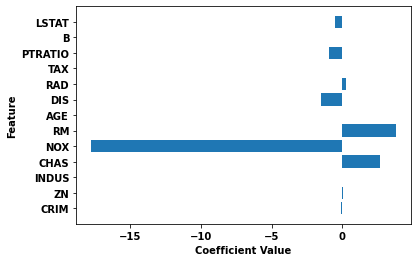

In [20]:
%matplotlib inline
# you give it a model, features, and the feature names
def plot_coefficients(model, n_features, feature_names):
    pl.barh(range(n_features), model.coef_[:-1], align='center')# plot the barplot of the coeficients except 1 which is not meaningful to us.
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

plot_coefficients(linreg, len(boston.feature_names), boston.feature_names) # plots order the features
# the coefficients that we find might not be important because we didn't normalize the data, which we need to. 

In [21]:
linreg.coef_

array([ -0.11,   0.05,   0.02,   2.69, -17.77,   3.81,   0.  ,  -1.48,   0.31,  -0.01,  -0.95,   0.01,  -0.52,   0.  ])

In [22]:
linreg.coef_[:-1]

array([ -0.11,   0.05,   0.02,   2.69, -17.77,   3.81,   0.  ,  -1.48,   0.31,  -0.01,  -0.95,   0.01,  -0.52])

In [23]:
print (linreg.intercept_) # access to the intercepts

36.4594883850899


In [24]:
#linreg?

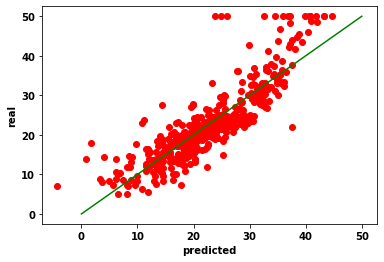

In [25]:
# y^ (predicted) vs y (real)
# Plot outputs
%matplotlib inline
pl.plot(p, y,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()


<p>This is a common plot for regression.Plots y^ vs y.  You want ideally for y^ and y to be particullary exactly aligned, which rarely happens. The clustered around the around the line, the better your regression model is. </p>

#### Just like in classifications,you don't want to estimate your RMSE only once because you may over fit on a lucky training set so you may want to do that several times. 

In [26]:
# Now let's compute RMSE using 10-fold x-validation
n = 10
#kf = KFold(len(x),n_splits=n)

kf = KFold(n_splits=n)
kf.get_n_splits(x)

#print(kf)  
#KFold(n_splits=n,random_state=None, shuffle=False)
 

xval_err = 0
#or train,test in kf:
for train, test in kf.split(x): # here are doing multiple train, test splits. 
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])   # predict on the test set. 
    e = p-y[test]                 # look at the test error
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))   # look at the cross validation error for each of the folds
       
rmse_10cv = xval_err/n            # then you get the average RMSE cross validation score by diving by 10

In [27]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv) 

Method: Simple Linear Regression
RMSE on training: 4.6792
RMSE on 10-fold CV: 5.1808


<p>There is a little bit of more error in the <strong>RMSE on 10-fold CV</strong> which is expected. We have a better estimate of how well we are going to do because it does it several times. </p>

#### Let's try Ridge Regression:

In [28]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5) # for ridge you are going to have this alpha, in classic it is called lambda, in sci-kitlearn alpha, which is our regularization term. 

# Train the model using the training set
ridge.fit(x,y)

Ridge(alpha=0.5)

In [29]:
# Compute RMSE on training data
p = ridge.predict(x)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
n = 10 # since we want something stronger, we do k fold.
#kf = KFold(len(x), n_folds=n)

kf = KFold(n_splits=n)
kf.get_n_splits(x)

print(kf)  
KFold(n_splits=n,random_state=None, shuffle=False)
 
# so we derive the cross validation error for every fold. 
xval_err = 0
for train, test in kf.split(x):
    ridge.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
rmse_10cv = xval_err/n

# we print the same way we did it earlier. 
method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

KFold(n_splits=10, random_state=None, shuffle=False)
Method: Ridge Regression
RMSE on training: 4.6854
RMSE on 10-fold CV: 4.3427


#### (Please explain more)So, here we did 10 splits and the difference in RMSE on training and 10-fold CV is not as big as before so this was randomly bad training set.

#### We can try different values of alpha and observe the impact on x-validation RMSE

In [30]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)  # 20 increments between 0.01 and 20 and we taking 50 steps in between.

# declare training and cv rmse arrays because we are going to collect them over multiple tries of alpha. 
t_rmse = np.array([])    
cv_rmse = np.array([])

# tune for multiple values of the alpha parameter. 
for a in alpha:     # for a in alpha, repeat all the steps we have done
    ridge = Ridge(alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(x,y)
    p = ridge.predict(x)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(n_splits=10)
    kf.get_n_splits(x)
 
    KFold(n_splits=10,random_state=None, shuffle=False)
    # computing RMSE using 10-fold cross validation
    #kf = KFold(len(x), n_folds=10)
    xval_err = 0
    for train, test in kf.split(x):
        ridge.fit(x[train], y[train])
        p = ridge.predict(x[test])
        err = p - y[test]
        xval_err += np.sqrt(np.dot(err,err)/len(x[test]))
    rmse_10cv = xval_err/n
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.6792		 5.1787
0.418	 4.6839		 5.1245
0.826	 4.6917		 5.1011
1.234	 4.6996		 5.0893
1.642	 4.7066		 5.0826
2.050	 4.7128		 5.0785
2.458	 4.7182		 5.0756
2.866	 4.7230		 5.0735
3.274	 4.7271		 5.0718
3.682	 4.7308		 5.0704
4.090	 4.7341		 5.0691
4.498	 4.7370		 5.0679
4.906	 4.7397		 5.0668
5.313	 4.7421		 5.0657
5.721	 4.7443		 5.0647
6.129	 4.7464		 5.0637
6.537	 4.7483		 5.0628
6.945	 4.7500		 5.0618
7.353	 4.7516		 5.0609
7.761	 4.7532		 5.0599
8.169	 4.7546		 5.0590
8.577	 4.7560		 5.0581
8.985	 4.7573		 5.0573
9.393	 4.7585		 5.0564
9.801	 4.7597		 5.0556
10.209	 4.7609		 5.0547
10.617	 4.7620		 5.0539
11.025	 4.7630		 5.0531
11.433	 4.7640		 5.0523
11.841	 4.7650		 5.0515
12.249	 4.7659		 5.0507
12.657	 4.7668		 5.0500
13.065	 4.7677		 5.0492
13.473	 4.7686		 5.0485
13.881	 4.7695		 5.0478
14.289	 4.7703		 5.0471
14.697	 4.7711		 5.0464
15.104	 4.7719		 5.0458
15.512	 4.7727		 5.0451
15.920	 4.7734		 5.0444
16.328	 4.7742		 5

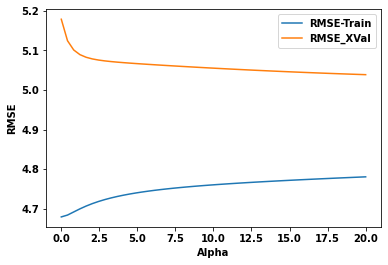

In [31]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

<p><strong>So where should your best alpha be? Should it be somewhere on the right. </strong></p>

#### To make comparisons across methods easier, let's parametrize the regression methods:

<p>The main difference between Lasso and Ridge is the penalty term they use.</p>
<p>* Ridge uses L2 penalty term which limits the size of the coefficient vector.</p>
<p>* Lasso uses L1 penalty which imposes sparsity among the coefficients and thus, makes the fitted model more interpretable. </p>
<p>* Elasticnet is a comprimise between these two techniques, and has a penaly which is a mix of L1 and L2 norms. </p> 

In [32]:
a = 0.3 # usin the same alpha for all three of them. 
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(x,y)
    p = met.predict(x)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    #kf = KFold(len(x), n_folds=10)
    kf = KFold(n_splits=10)
    kf.get_n_splits(x)

    KFold(n_splits=n,random_state=None, shuffle=False)
    err = 0
    for train,test in kf.split(x):
        met.fit(x[train],y[train])
        p = met.predict(x[test])
        e = p-y[test]
        err += np.dot(e,e)
    rmse_10cv = np.sqrt(err/len(x))
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print ("\n")

Method: linear regression
RMSE on training: 4.6792
RMSE on 10-fold CV: 5.8770


Method: lasso
RMSE on training: 4.8563
RMSE on 10-fold CV: 5.7637


Method: ridge
RMSE on training: 4.6819
RMSE on 10-fold CV: 5.8487


Method: elastic-net
RMSE on training: 4.9067
RMSE on 10-fold CV: 5.4921




<p>Here we see that elastic net is slighly outperforming everyone on training. We expect <strong>elastic-net</strong> to be better than Lasso and ridge becuase it has both of them integrated </p>

#### Now let's try to do regression via Stochastic Gradient Descent.

In [33]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # This is the standard scaler
scaler.fit(x)
x_s = scaler.transform(x) # we apply it to x so that the data is normalized. 

#print(x_s)

# you call it just like the previous models. 
# we can tell it to either use L1 or L2 norm depending on what we are trying to minimise.
sgdreg = SGDRegressor(penalty='l2', alpha=0.1, max_iter=300)           

# Compute RMSE on training data
sgdreg.fit(x_s,y)
p = sgdreg.predict(x_s)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
#kf = KFold(len(x), n_folds=10)
kf = KFold(n_splits=10)
kf.get_n_splits(x)

KFold(n_splits=n,random_state=None, shuffle=False)
    
xval_err = 0
for train,test in kf.split(x):
    scaler = StandardScaler()
    scaler.fit(x[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(x[train])
    xtest_s = scaler.transform(x[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y[train])
    p = sgdreg.predict(xtest_s)
    e = p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 4.7617
RMSE on 10-fold CV: 5.6143


<p>It got a little abit better, but not by much;<strong>Comparing RMSE on 10-fold CV: 5.6167 and RMSE on 10-fold CV: 5.4921 (from the previous step). </strong></p>

#### Using the regression implementation from Machine Learning in Action, Chapter 8:

In [34]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [35]:
w = standRegres(x,y)

In [36]:
print (w)

[[ -0.11]
 [  0.05]
 [  0.02]
 [  2.69]
 [-17.77]
 [  3.81]
 [  0.  ]
 [ -1.48]
 [  0.31]
 [ -0.01]
 [ -0.95]
 [  0.01]
 [ -0.52]
 [ 36.46]]


In [37]:
def ridgeRegres(xArr,yArr,lam=0.2):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

In [38]:
w_ridge = ridgeRegres(x,y,0.5)
print (w_ridge)

[[-0.1 ]
 [ 0.05]
 [-0.  ]
 [ 2.68]
 [-9.53]
 [ 4.56]
 [-0.  ]
 [-1.26]
 [ 0.25]
 [-0.01]
 [-0.73]
 [ 0.01]
 [-0.49]
 [21.76]]


#### Now that we have the regression coefficients, we can compute the predictions:

In [39]:
xMat=np.mat(x)
yMat=np.mat(y)
yHat = xMat*w_ridge

In [40]:
yHat.shape

(506, 1)

In [41]:
print (yHat[0:10])

[[29.8 ]
 [24.75]
 [30.78]
 [29.12]
 [28.61]
 [25.35]
 [22.48]
 [19.28]
 [11.21]
 [18.65]]


In [42]:
print (yMat.T[0:10])

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]]


#### Model evaluation and cross validation can be performed as before.

In [43]:
yHat.A.ravel()

array([29.8 , 24.75, 30.78, 29.12, 28.61, 25.35, 22.48, 19.28, 11.21, 18.65, 19.03, 21.15, 20.51, 20.15, 19.84, 19.79,
       21.17, 17.52, 16.23, 18.68, 12.83, 18.15, 16.6 , 14.34, 16.27, 13.62, 15.97, 15.29, 20.45, 21.86, 12.  , 18.54,
        9.45, 14.57, 14.11, 23.35, 21.87, 22.83, 22.8 , 31.37, 34.5 , 28.21, 24.95, 24.47, 22.57, 21.37, 19.91, 17.7 ,
        8.69, 16.69, 20.87, 23.44, 27.51, 23.63, 16.11, 32.02, 25.3 , 32.9 , 22.18, 21.13, 17.87, 18.45, 24.3 , 23.48,
       24.42, 29.71, 24.61, 20.81, 16.99, 20.45, 24.99, 21.23, 24.05, 23.72, 25.05, 23.41, 22.21, 22.65, 20.85, 21.64,
       28.49, 26.86, 25.86, 24.71, 24.63, 27.58, 21.77, 25.22, 30.6 , 30.94, 26.74, 26.96, 28.32, 28.36, 26.22, 28.09,
       24.01, 36.23, 35.56, 32.35, 25.09, 26.15, 19.38, 20.46, 21.48, 18.39, 17.15, 20.78, 22.89, 19.99, 21.01, 26.49,
       20.21, 20.35, 24.68, 19.8 , 23.06, 23.15, 19.73, 20.23, 21.62, 22.15, 20.26, 16.17, 20.16, 22.12, 14.24, 15.59,
       19.85, 14.53, 20.93, 20.25, 20.88, 16.35,

In [44]:
yHat.A.shape

(506, 1)

In [45]:
type(boston.feature_names)

numpy.ndarray